In [1]:
# from google.colab import files
# files.upload()

{}

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load Data and Data Overview

In [3]:
dataset = pd.read_csv('churn_dataset.csv')
print('Dataset shape: ', dataset.shape)

Dataset shape:  (7043, 21)


In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Check if there are any NaNs in the data

In [7]:
# Numbers of NaNs for each object
dataset.isnull().sum(axis=1).head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [8]:
# Numbers of NaNs for each features
dataset.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# We notice that in data.info the type of TotalCharges is object
# while head of this features is numerical, so we need to convert
# total charges to a numerical data type.
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
# Removing miss values
dataset.dropna(inplace=True)


# Data Cleaning

In [11]:
# Remove constant features
features_counts = dataset.nunique(dropna=False)
# features_counts = dataset.nunique()
features_counts.sort_values()
constant_features = features_counts.loc[features_counts==1].index.tolist()
print(constant_features)

[]


In [12]:
# We can see there is no duplicated features in this dataset
# Next, we examine the number of unique values in each feature
nunique = dataset.nunique()
nunique

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
# Check outliers in numerical features
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# Covert Categorical Variables into dummy variables
# df_dummies = pd.get_dummies(df)
# df_dummies.head()

# Data Exploration and Feature Engineering

In [16]:
# Drop customerID and split data to Churn=1 dataset1 and Churn=0 dataset0 
# to analysis influence of features
dataset = dataset.drop(['customerID'], axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
dataset0 = dataset[dataset['Churn']=='No']
dataset1 =dataset[dataset['Churn']=='Yes']
# dataset0.head()
# dataset1.head()

In [18]:
dataset0.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Categorial Features

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


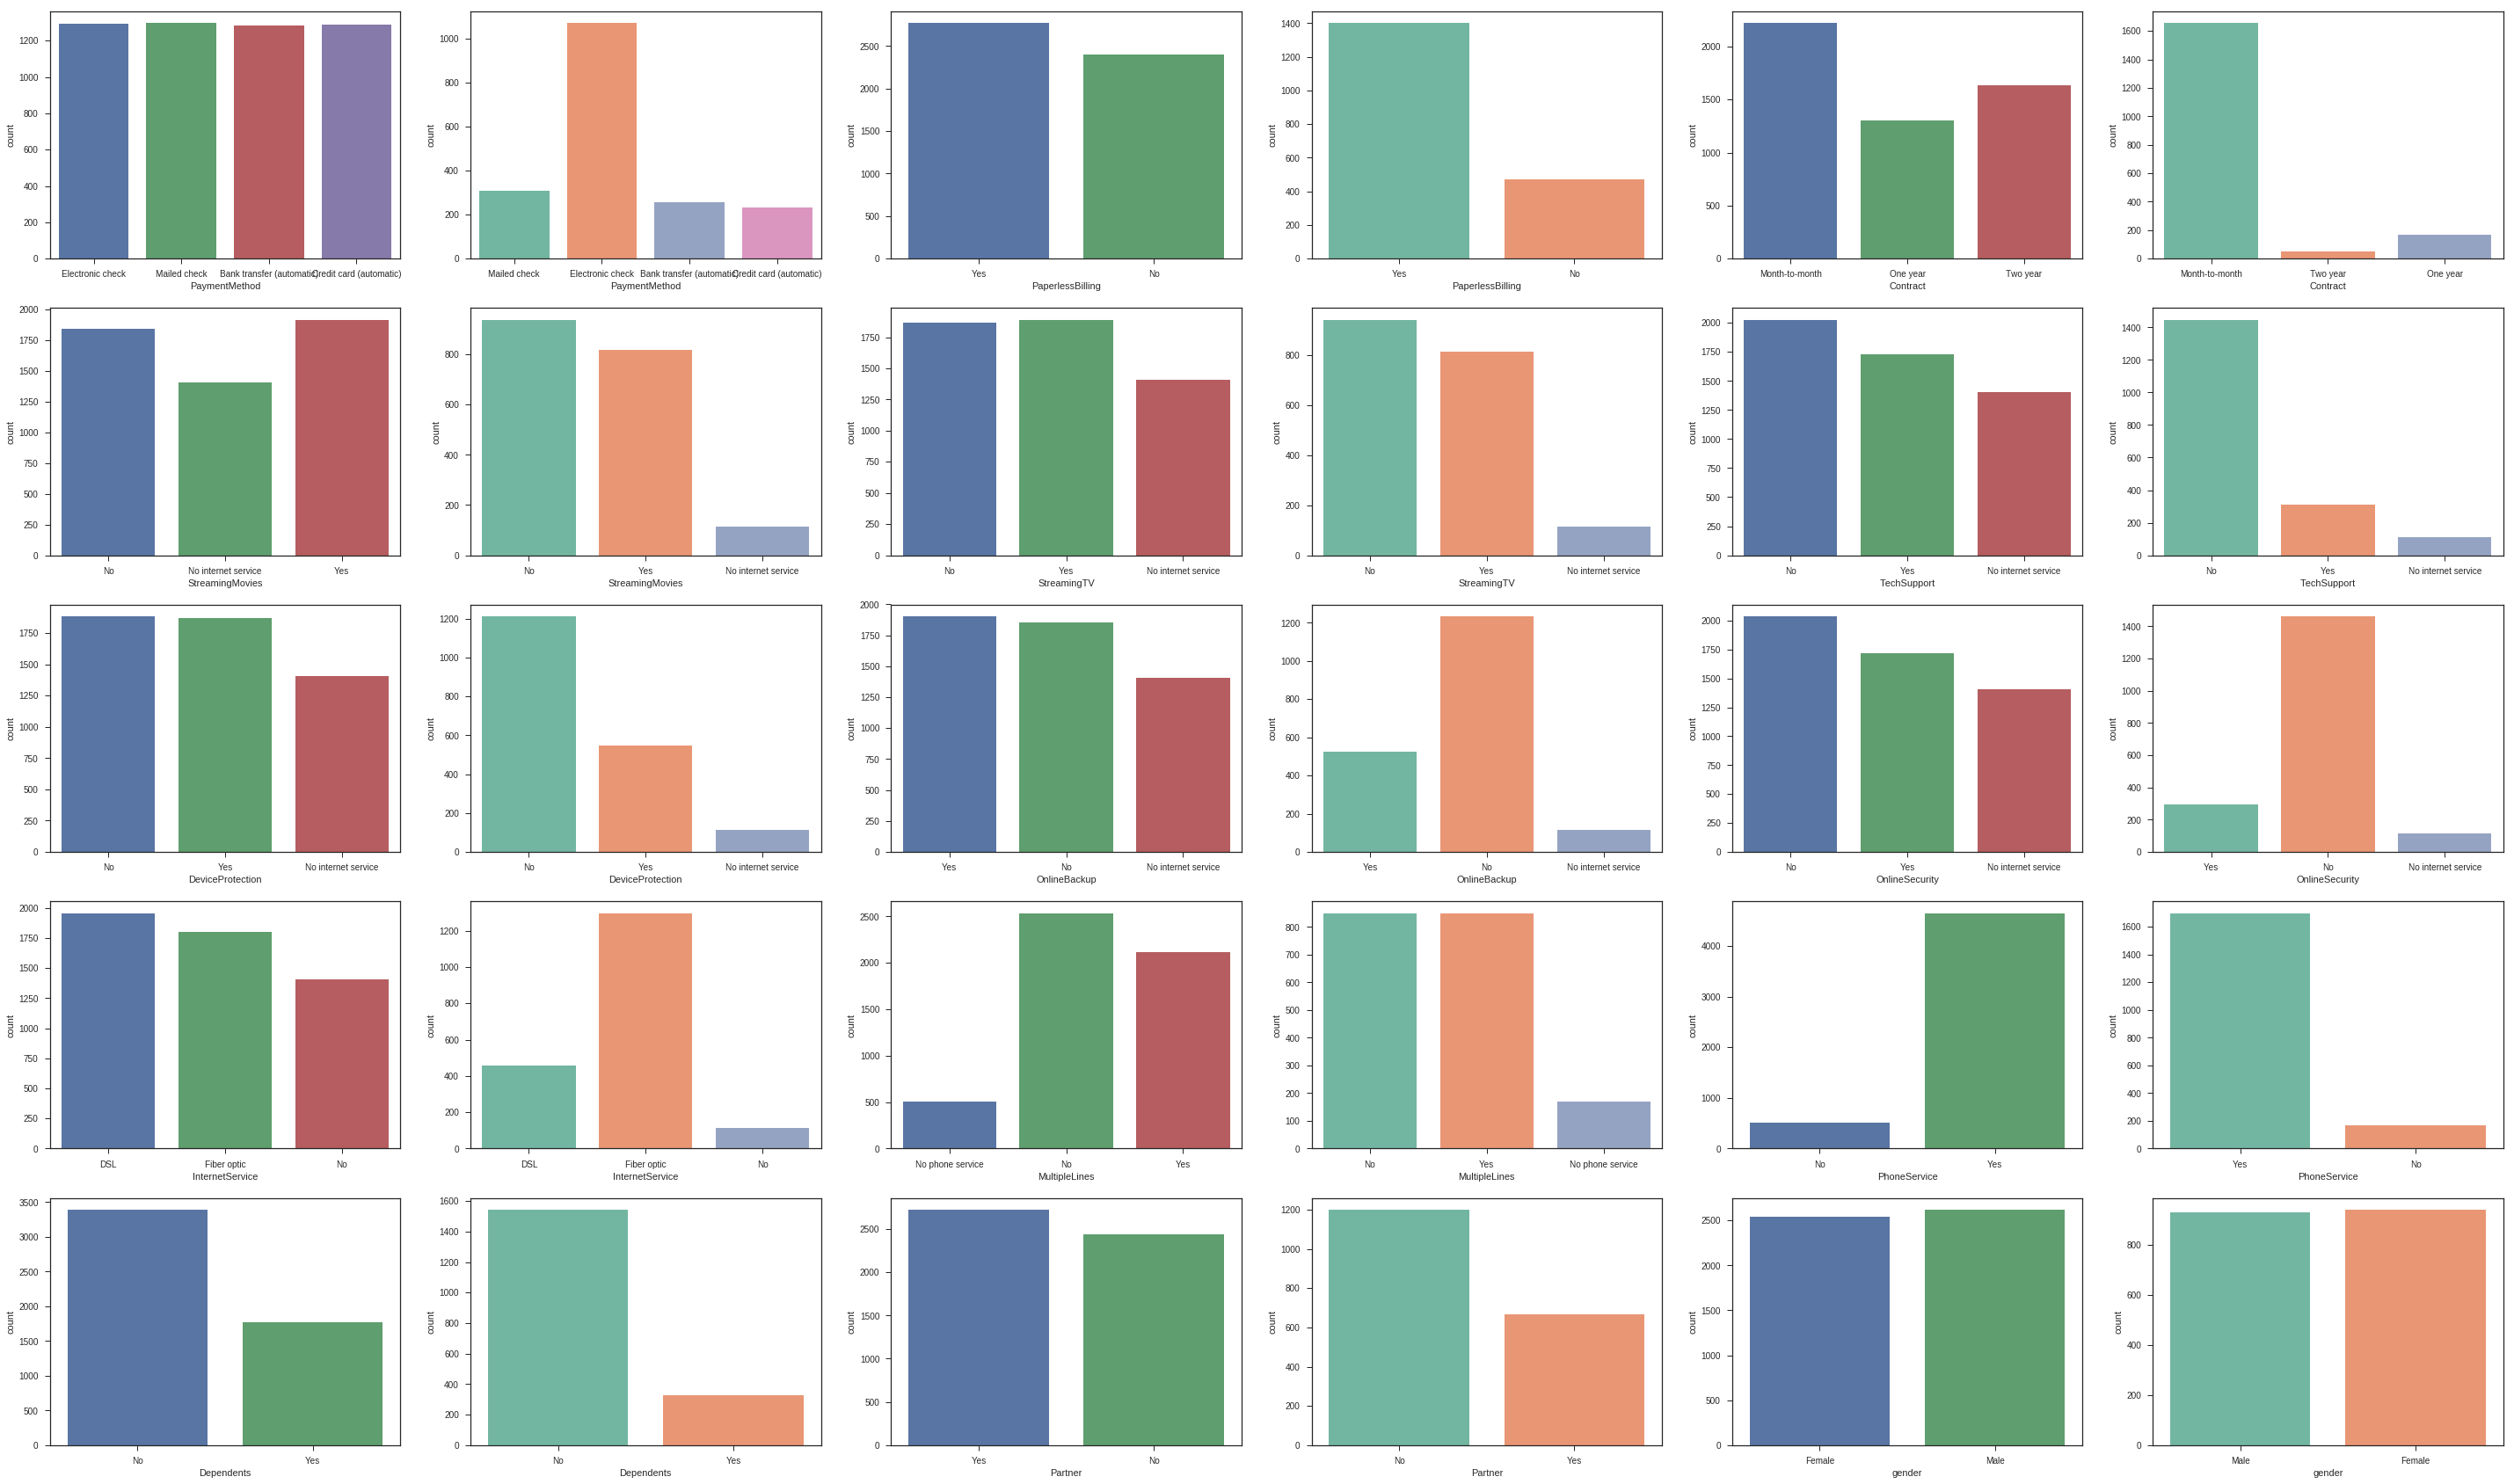

In [19]:
# Palette colors are for Churn=1
sns.set(style="ticks", color_codes=True)
fig, axes = plt.subplots(nrows = 5,ncols = 6,figsize = (50,30))

features = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
row, col = 0, 0

for row in range(5):
  for col in range(0, 6, 2):
      feature = features.pop()
      sns.countplot(x=feature, data=dataset0, ax=axes[row][col])
      sns.countplot(x=feature,data=dataset1,palette="Set2", ax=axes[row][col+1])

plt.show(fig)

Numerical Features

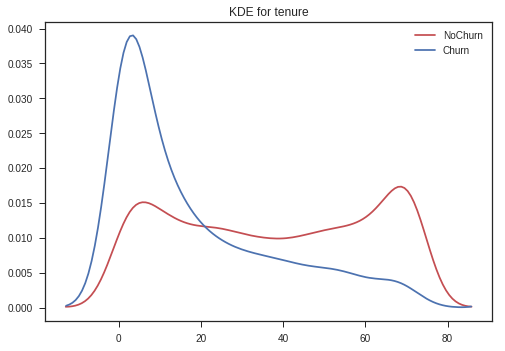

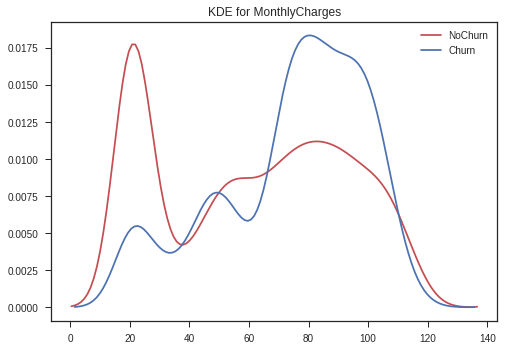

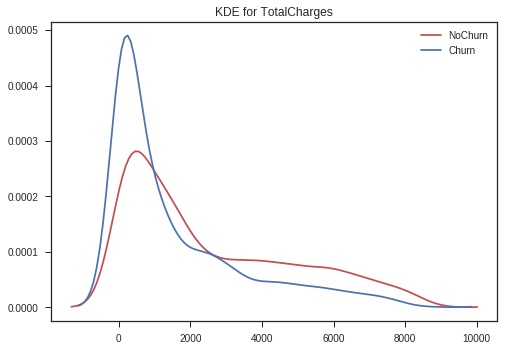

In [20]:
num_features = ['tenure', 'MonthlyCharges','TotalCharges']
for i in range(3):
  num_feature = num_features[i]
  plt.figure(i)
  plt.title("KDE for {}".format(num_feature))
  ax0 = sns.kdeplot(dataset0[num_feature].dropna(), color= 'r', label= 'NoChurn')
  ax1 = sns.kdeplot(dataset1[num_feature].dropna(), color= 'b', label= 'Churn')

In [21]:
dataset_copy = pd.get_dummies(dataset)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# # Normalize and Prepare Data
# dataset = dataset_copy
# y = dataset.Churn_Yes.values
# x_ = dataset.drop(['Churn_Yes', 'Churn_No'], axis=1)
# x = (x_ -np.min(x_))/(np.max(x_)-np.min(x_)).values
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=111)
# classifiers = [['RandomForest :',RandomForestClassifier()], 
#                ['LogisticRegression :', LogisticRegression()],
#                ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

# predictions_df = pd.DataFrame()
# predictions_df['true_labels'] = y_test

# for name,classifier in classifiers:
#     classifier = classifier
#     classifier.fit(x_train, y_train)
#     predictions = classifier.predict(x_test)
#     predictions_df[name.strip(" :")] = predictions
#     print(name, accuracy_score(y_test, predictions))

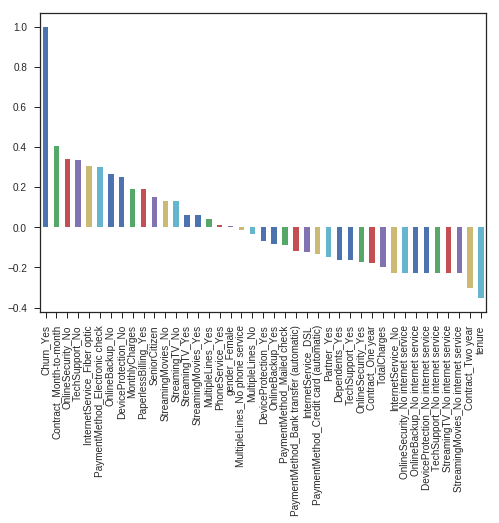

In [23]:
dataset_copy.columns.values
tobedrop = ['gender_Male', 'Partner_No','Dependents_No', 'PhoneService_No',
            'PaperlessBilling_No','Churn_No']
dataset = dataset_copy.drop(tobedrop, axis=1)
y = dataset_copy['Churn_Yes']
plt.figure()
dataset.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar')

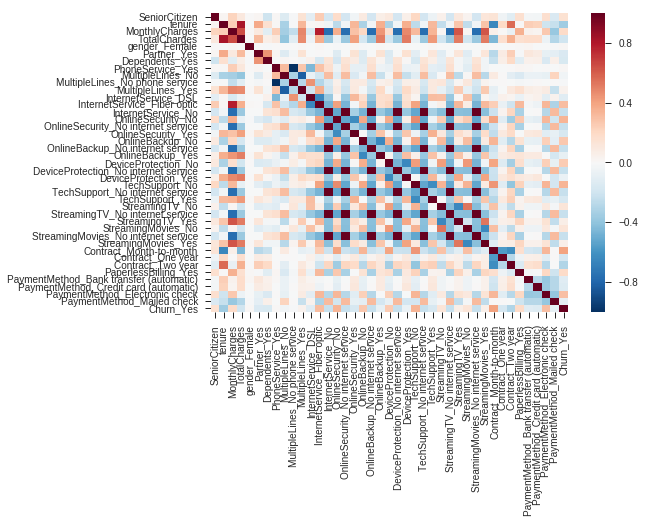

In [24]:
# Feature correlation heatmap
corr = dataset.corr()
sns.heatmap(corr)

In [0]:
# Remove one of two features that have a correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = dataset.columns[columns]
dataset = dataset[selected_columns]

In [26]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1


In [0]:
# # Normalize and Prepare Data
# y = dataset.Churn_Yes.values
# x_ = dataset.drop(['Churn_Yes'], axis=1)
# x = (x_ -np.min(x_))/(np.max(x_)-np.min(x_)).values
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=111)
# classifiers = [['RandomForest :',RandomForestClassifier()], 
#                ['LogisticRegression :', LogisticRegression()],
#                ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

# predictions_df = pd.DataFrame()
# predictions_df['true_labels'] = y_test

# for name,classifier in classifiers:
#     classifier = classifier
#     classifier.fit(x_train, y_train)
#     predictions = classifier.predict(x_test)
#     predictions_df[name.strip(" :")] = predictions
#     print(name, accuracy_score(y_test, predictions))

In [28]:
tobedrop = ['gender_Female']
dataset.drop(tobedrop, axis=1, inplace=True)
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,151.65,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [0]:
# Normalize and Prepare Data
# y = dataset.Churn_Yes.values
# x_ = dataset.drop(['Churn_Yes'], axis=1)
# x = (x_ -np.min(x_))/(np.max(x_)-np.min(x_)).values
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=111)
# classifiers = [['RandomForest :',RandomForestClassifier()], 
#                ['LogisticRegression :', LogisticRegression()],
#                ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

# predictions_df = pd.DataFrame()
# predictions_df['true_labels'] = y_test

# for name,classifier in classifiers:
#     classifier = classifier
#     classifier.fit(x_train, y_train)
#     predictions = classifier.predict(x_test)
#     predictions_df[name.strip(" :")] = predictions
#     print(name, accuracy_score(y_test, predictions))

In [30]:
dataset.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'], dtype=object)

In [31]:
tobedrop = ['OnlineSecurity_No',  'OnlineBackup_No','DeviceProtection_No', 'TechSupport_No',
           'StreamingTV_No', 'StreamingMovies_No']
dataset.drop(tobedrop, axis=1, inplace=True)
dataset.head()
# # Normalize and Prepare Data
# y = dataset.Churn_Yes.values
# x_ = dataset.drop(['Churn_Yes'], axis=1)
# x = (x_ -np.min(x_))/(np.max(x_)-np.min(x_)).values
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=111)
# classifiers = [['RandomForest :',RandomForestClassifier()], 
#                ['LogisticRegression :', LogisticRegression()],
#                ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

# predictions_df = pd.DataFrame()
# predictions_df['true_labels'] = y_test

# for name,classifier in classifiers:
#     classifier = classifier
#     classifier.fit(x_train, y_train)
#     predictions = classifier.predict(x_test)
#     predictions_df[name.strip(" :")] = predictions
#     print(name, accuracy_score(y_test, predictions))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,151.65,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [0]:
# Normalize and Prepare Data
y = dataset.Churn_Yes.values
x_ = dataset.drop(['Churn_Yes'], axis=1)
x = (x_ -np.min(x_))/(np.max(x_)-np.min(x_)).values

# Training model

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=111)

In [34]:
# x_train.describe 
x_train.isnull().sum(axis=0)

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Partner_Yes                                0
Dependents_Yes                             0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_Yes                         0
OnlineBackup_Yes                           0
DeviceProtection_Yes                       0
TechSupport_Yes                            0
StreamingTV_Yes                            0
StreamingMovies_Yes                        0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaperlessB

In [35]:
classifiers = [['RandomForest :',RandomForestClassifier()], 
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['true_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest : 0.7747440273037542


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Neural Network : 0.7923777019340159
LogisticRegression : 0.8003412969283277
AdaBoostClassifier : 0.8088737201365188
GradientBoostingClassifier:  0.8026166097838453
XGB : 0.8020477815699659
